# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (7,5)
plt.rcParams['figure.dpi'] = 150
sns.set_theme(style='darkgrid', palette='viridis')

In [2]:
df = pd.read_csv('Salary_dataset.csv', index_col=0)
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


# EDA

In [3]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


<Axes: xlabel='YearsExperience', ylabel='Salary'>

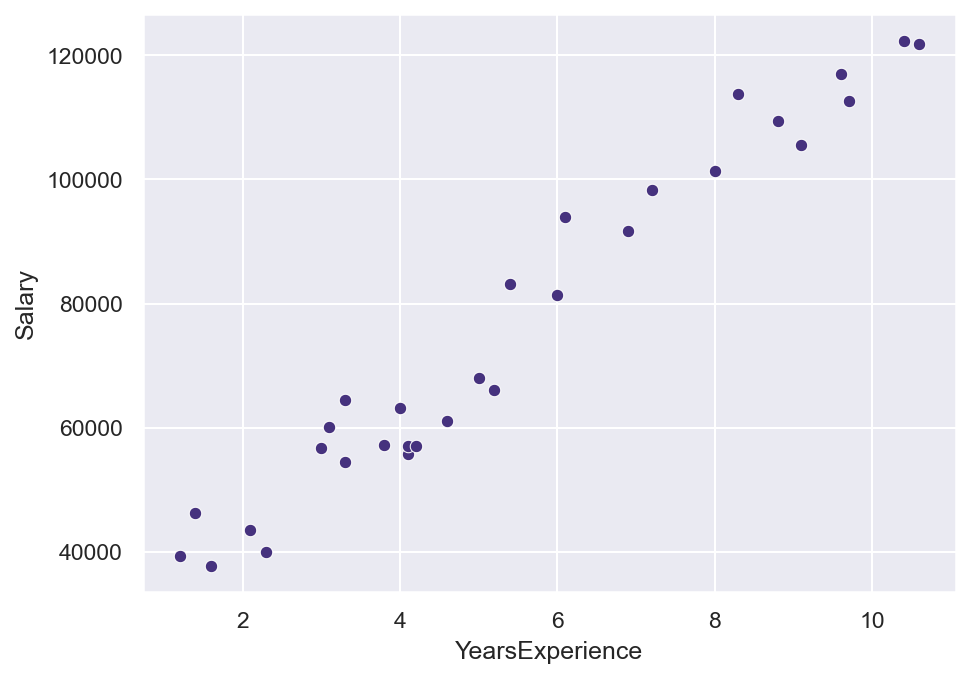

In [4]:
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'])

# Correlation analysis

<Axes: >

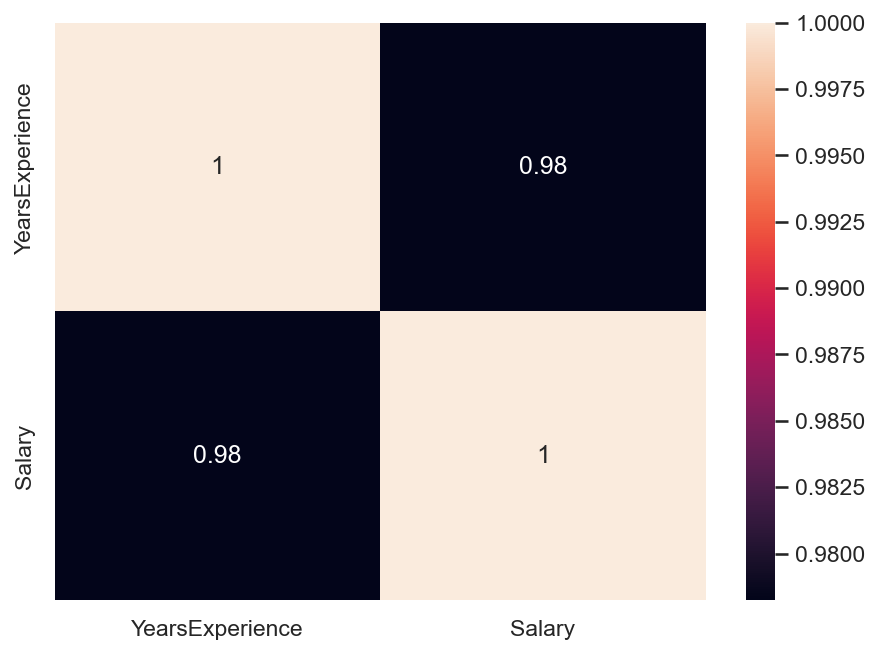

In [5]:
sns.heatmap(df.corr(), annot=True)

# Model

In [6]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [7]:
#Defining x & y
x = df[['YearsExperience']]   #Independent data must be in 2D
y = df['Salary']  #Target column should be in 1D

In [8]:
#Model training

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
lr = LinearRegression()

In [11]:
lr.fit(x,y)

LinearRegression()

In [12]:
lr.coef_

array([9449.96232146])

In [13]:
lr.intercept_

24848.203966523208

In [14]:
print(f"Slope is : {lr.coef_}")
print(f"Intercept is : {lr.intercept_}")

Slope is : [9449.96232146]
Intercept is : 24848.203966523208


# Prediting for Actual Values

In [15]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


In [16]:
ypred = lr.predict(df[['YearsExperience']])
ypred

array([ 36188.15875227,  38078.15121656,  39968.14368085,  44693.12484158,
        46583.11730587,  53198.09093089,  54143.08716303,  56033.07962732,
        56033.07962732,  60758.06078805,  62648.05325234,  63593.04948449,
        63593.04948449,  64538.04571663,  68318.03064522,  72098.0155738 ,
        73988.00803809,  75878.00050238,  81547.97789525,  82492.9741274 ,
        90052.94398456,  92887.932681  , 100447.90253816, 103282.8912346 ,
       108007.87239533, 110842.86109176, 115567.84225249, 116512.83848464,
       123127.81210966, 125017.80457395])

In [17]:
y 

0      39344.0
1      46206.0
2      37732.0
3      43526.0
4      39892.0
5      56643.0
6      60151.0
7      54446.0
8      64446.0
9      57190.0
10     63219.0
11     55795.0
12     56958.0
13     57082.0
14     61112.0
15     67939.0
16     66030.0
17     83089.0
18     81364.0
19     93941.0
20     91739.0
21     98274.0
22    101303.0
23    113813.0
24    109432.0
25    105583.0
26    116970.0
27    112636.0
28    122392.0
29    121873.0
Name: Salary, dtype: float64

# Model Evaluation

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
mse = mean_squared_error(y, ypred)  
rmse = np.sqrt(mse)
r2 = r2_score(y,ypred)

In [20]:
print(f"MSE : {mse}")
print(f"RMSE : {rmse}")
print(f"R2 : {r2}")

MSE : 31270951.722280957
RMSE : 5592.043608760661
R2 : 0.9569566641435086


In [21]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


# Visualizing the model

<Axes: xlabel='YearsExperience', ylabel='Salary'>

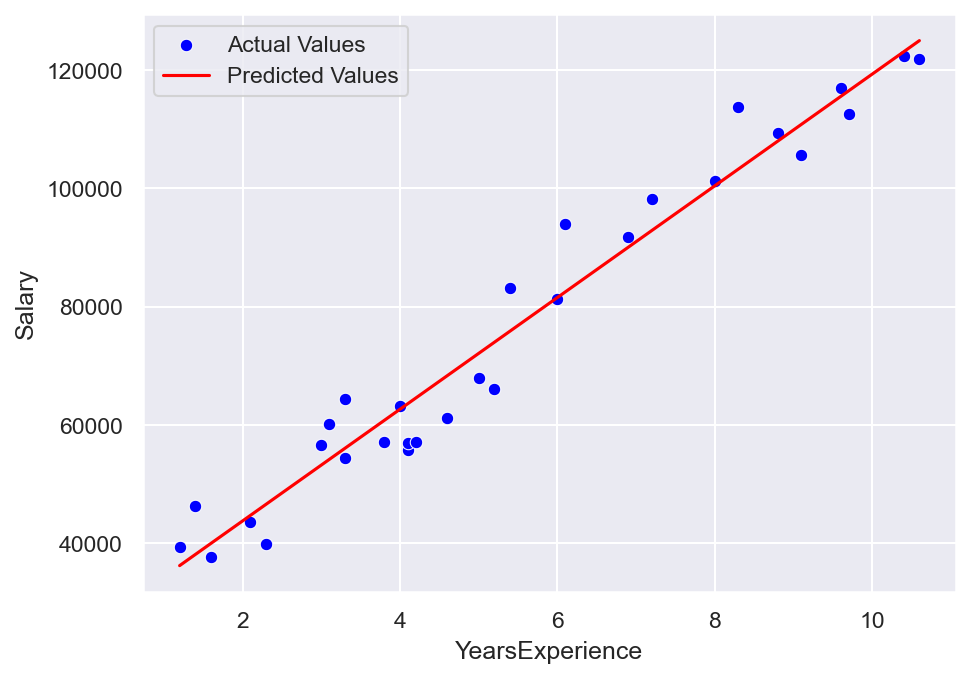

In [28]:
sns.scatterplot(x = df['YearsExperience'], y = df['Salary'], color = 'blue',label = 'Actual Values')
sns.lineplot(x = df['YearsExperience'], y = ypred, color = 'red', label = 'Predicted Values')

# Predicting for New Values

In [29]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [30]:
test = pd.DataFrame({'YearsExperience' : [2,2.67,6,9,9.5,11.9,10,20]})
test

,YearsExperience
0,2.00
1,2.67
2,6.00
3,9.00
4,9.50
5,11.90
6,10.00
7,20.00


In [31]:
lr.predict(test)

array([ 43748.12860943,  50079.60336481,  81547.97789525, 109897.86485962,
       114622.84602035, 137302.75559184, 119347.82718107, 213847.45039562])